<a href="https://colab.research.google.com/github/gmazzitelli/be-a-citizen-scientist/blob/master/BeACitizenScientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GET data from URL
Carica il file del questionario dalla URL (shared readeable file)
buona refence [link text](https://michaelsaruggia.com/python-per-data-science-pandas/)

In [0]:
import numpy as np
import pandas as pd
url_csv_file = "https://docs.google.com/spreadsheet/ccc?key=19zCRezCS3yIy6_Igzex2sotnNja2Ks57RonGX8W2R8I&output=csv"
df = pd.read_csv(url_csv_file).replace(np.nan, 'Nessuna risposta', regex=True)


qualche aggiustamento dei dati per distinguere grandi da piccoli e togliere sotituire un domanda con la virgala che la fa comparire come multiple choiche

In [0]:
df = df.replace({'Età in anni compiuti', '75 e oltre'}, {'Età in anni compiuti', 'tra 75 e oltre'} )
from sklearn.preprocessing import OrdinalEncoder
df['young'] = np.where(df['Età in anni compiuti']<'tra 25 e 34', 1, 0)
df['Sai quali pericoli potrebbero esserci nel postare le foto sui social?']=df['Sai quali pericoli potrebbero esserci nel postare le foto sui social?'].apply(
    lambda x: 'lo so - ma non mi interessa' if x == 'lo so, ma non mi interessa' else x)
young=df[df.young==1].copy()
old =df[df.young==0].copy()
df.head()

# dataset visualization

visualizza tutti dati in modo basico differenziando fra grandi e piccoli

tra 15 e 17       383
tra 11 e 14       208
tra 45 e 54       153
tra 18 e 19       120
tra 55 e 64        49
tra 35 e 44        45
tra 25 e 34        36
tra 20 e 24        17
tra 65 e 74         6
tra 75 e oltre      4
Name: Età in anni compiuti, dtype: int64


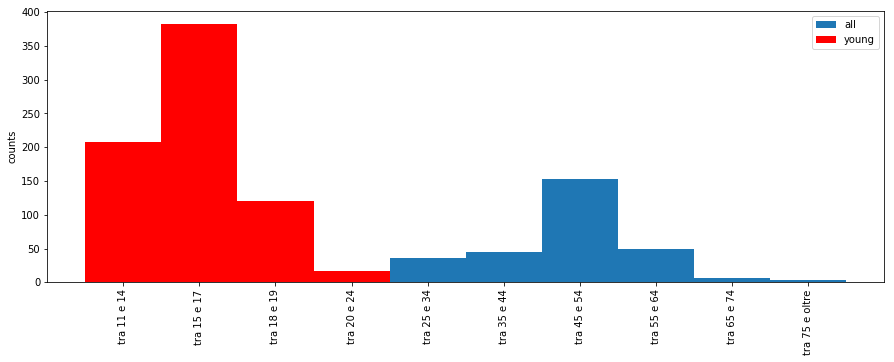

F    646
M    375
Name: Sesso, dtype: int64


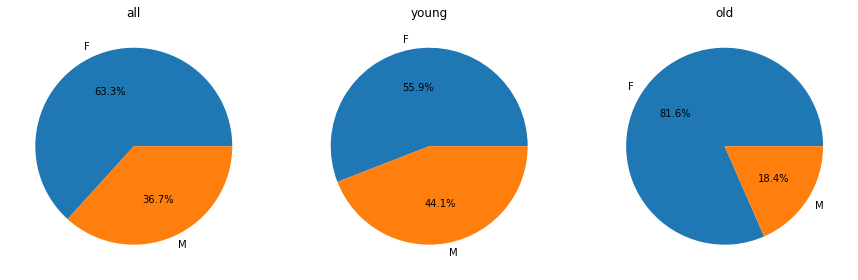

italiana    983
europea      22
altra        16
Name: Cittadinanza, dtype: int64


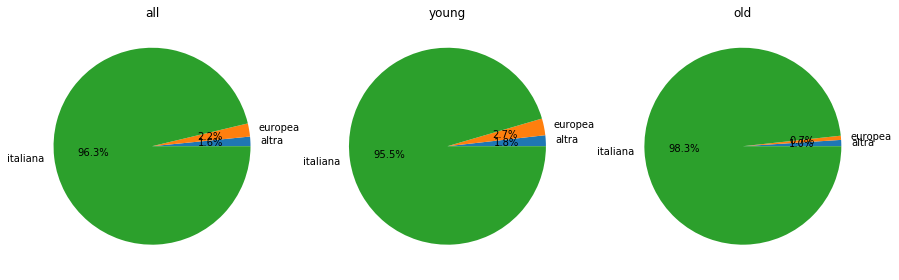

Sì                  958
Nessuna risposta     40
No                   23
Name: Sei nato in Italia?, dtype: int64


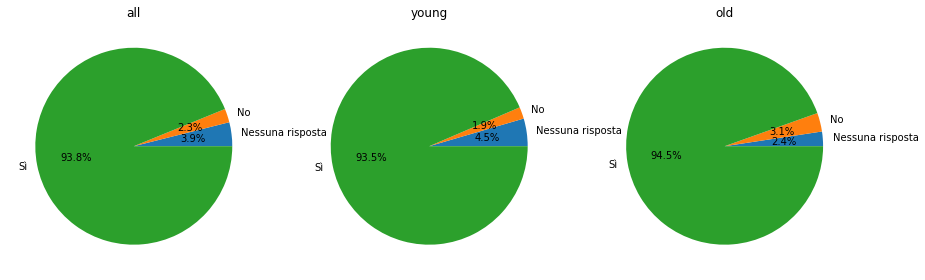

Roma                509
Varese              169
Perugia              78
Nessuna risposta     61
Foggia               26
Milano               21
Napoli               13
Como                 11
Salerno               9
Genova                9
Cosenza               9
Bari                  7
Reggio Calabria       6
Palermo               5
Monza Brianza         5
Brindisi              4
Ancona                4
Agrigento             3
Latina                3
L'Aquila              3
Torino                3
Potenza               3
Novara                3
Bologna               3
Catanzaro             3
Caserta               3
Siena                 2
Frosinone             2
Taranto               2
Lecce                 2
                   ... 
Verona                2
Vicenza               2
Trento                2
Padova                2
Matera                1
Arezzo                1
Firenze               1
Viterbo               1
Cremona               1
Ascoli Piceno         1
Catania         

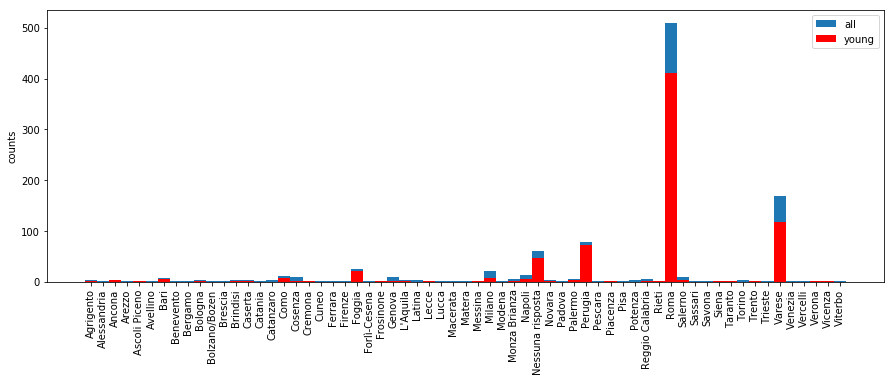

Roma                     623
Varese                   191
Perugia                   84
Como                      25
Foggia                    23
Genova                    11
Cosenza                    6
Ancona                     5
Milano                     4
Latina                     3
Barletta-Andria-Trani      3
Bologna                    3
Palermo                    3
Bari                       3
Alessandria                2
Trieste                    2
Siena                      2
Agrigento                  2
Vercelli                   2
Firenze                    2
Ferrara                    2
Monza e della Brianza      2
Vicenza                    1
Cuneo                      1
Cremona                    1
Pordenone                  1
Arezzo                     1
Torino                     1
Lecce                      1
Savona                     1
Rovigo                     1
Bergamo                    1
Brescia                    1
Lucca                      1
Reggio Calabri

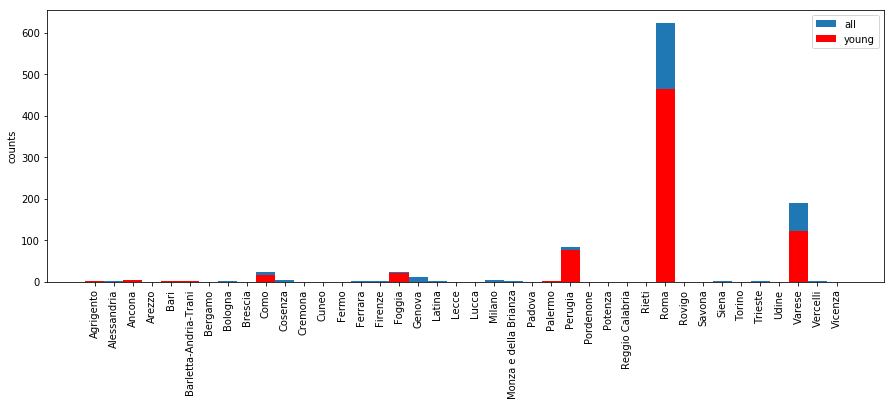

licenza di scuola secondaria di primo grado                                                                       580
laurea vecchio ordinamento                                                                                        117
scuola primaria                                                                                                   116
diploma di istituto tecnico                                                                                        54
licenza liceale                                                                                                    46
laurea magistrale biennale                                                                                         29
dottorato                                                                                                          22
laurea di primo livello                                                                                            19
diploma di istituto professionale                       

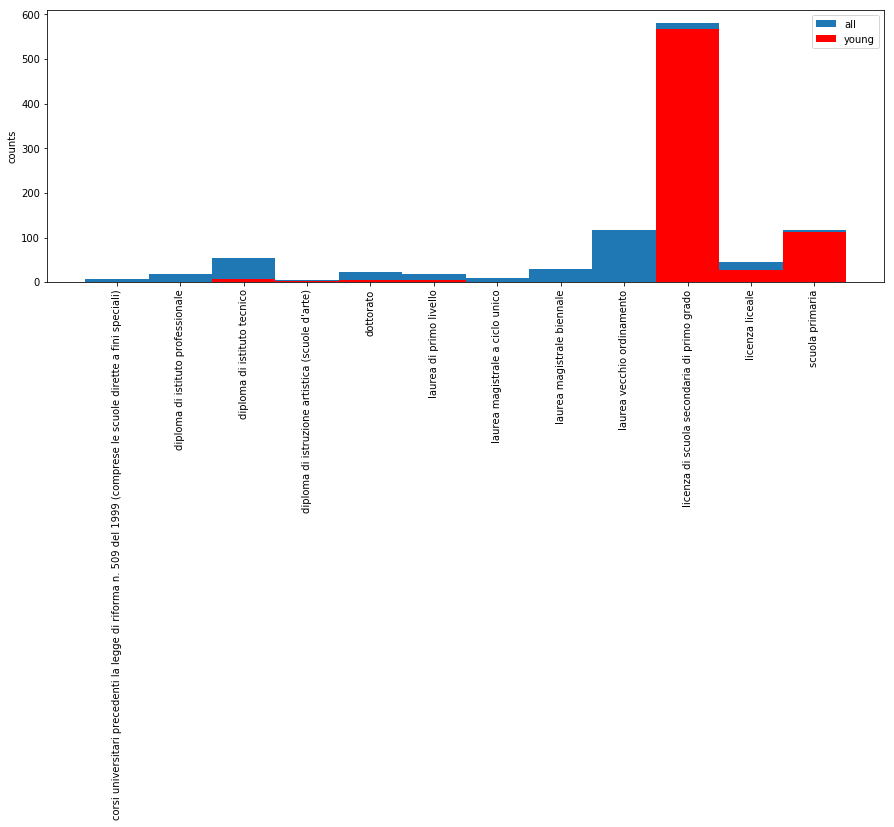

italiana    953
europea      35
altra        33
Name: Cittadinanza del padre, dtype: int64


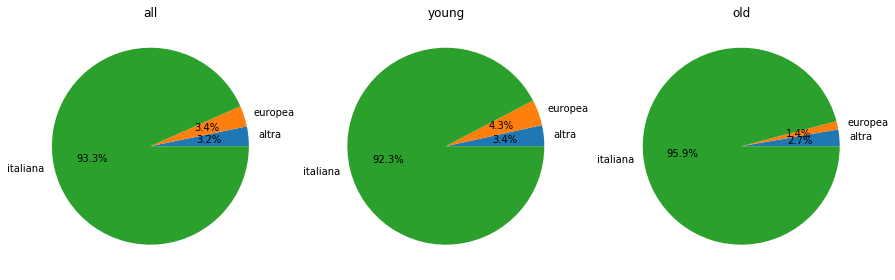

Sì                  922
Nessuna risposta     70
No                   29
Name: Tuo padre è nato in Italia?, dtype: int64


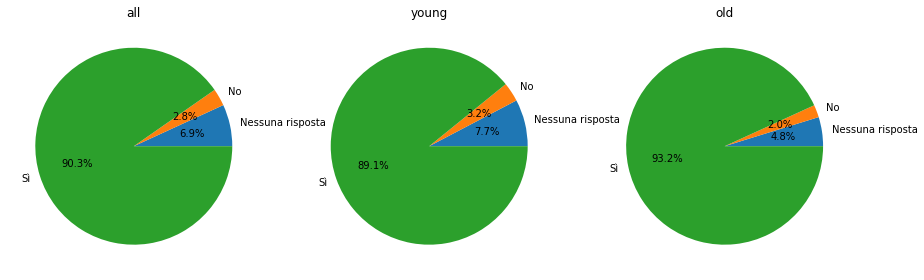

Roma                     344
Varese                   125
Nessuna risposta          97
Perugia                   65
Napoli                    33
Foggia                    27
Milano                    24
Reggio Calabria           14
Salerno                   12
Frosinone                 11
Palermo                   11
Cosenza                   10
Como                      10
Catanzaro                  9
L'Aquila                   9
Caserta                    8
Taranto                    8
Messina                    8
Bari                       8
Avellino                   8
Latina                     7
Genova                     7
Campobasso                 6
Terni                      6
Lecce                      6
Potenza                    6
Catania                    5
Siracusa                   5
Trieste                    5
Benevento                  5
                        ... 
Pesaro e Urbino            2
Ragusa                     2
Trento                     2
Belluno       

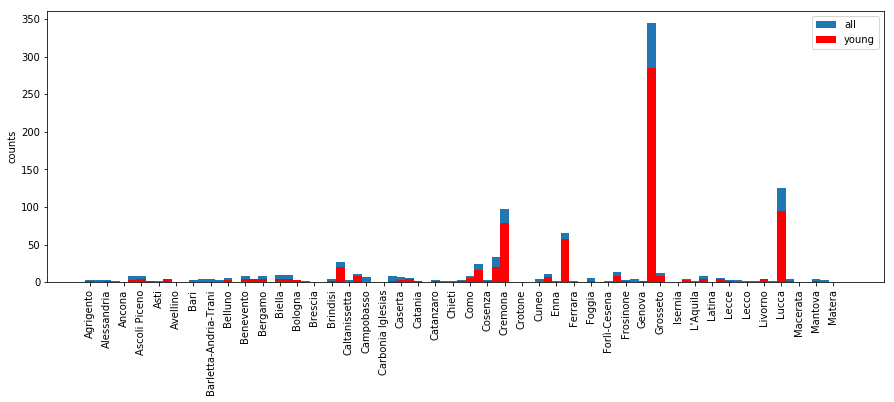

italiana    943
europea      42
altra        36
Name: Cittadinanza della madre, dtype: int64


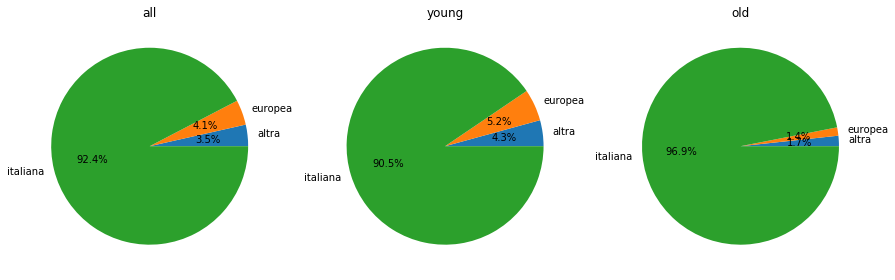

Sì                  905
Nessuna risposta     80
No                   36
Name: Tua madre è nata in Italia?, dtype: int64


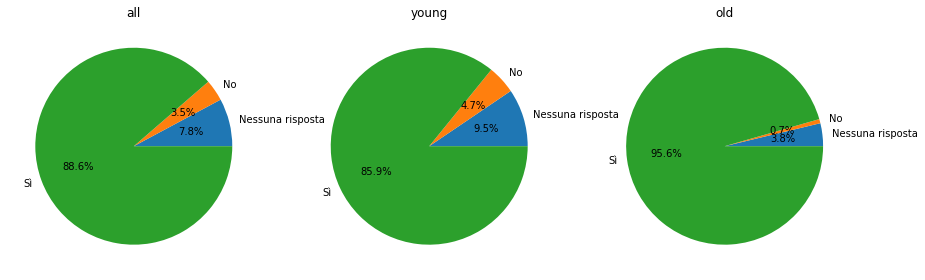

Roma                     344
Varese                   125
Nessuna risposta         114
Perugia                   64
Napoli                    29
Milano                    26
Foggia                    26
Bari                      14
Cosenza                   12
Como                      11
Caserta                   10
Avellino                  10
Potenza                   10
L'Aquila                  10
Venezia                    9
Reggio Calabria            9
Salerno                    9
Palermo                    8
Frosinone                  8
Catanzaro                  8
Lecce                      7
Genova                     7
Ancona                     6
Padova                     6
Brindisi                   5
Cagliari                   5
Agrigento                  5
Brescia                    4
Ferrara                    4
Forlì-Cesena               4
                        ... 
Asti                       2
Monza e della Brianza      2
Benevento                  2
Campobasso    

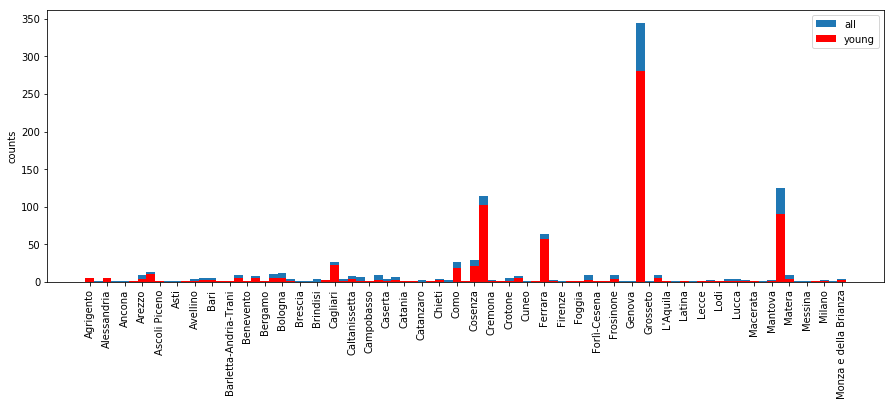

Sì    991
No     30
Name: Negli ultimi 12 mesi ti è mai capitato di cercare informazioni?, dtype: int64


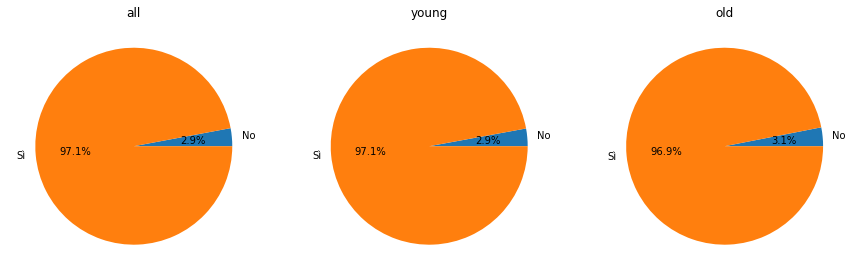

Tutti i giorni                   547
Più di due volte a settimana     326
Meno di due volte a settimana     94
Nessuna risposta                  30
Meno di una volta al mese         24
Name: Negli ultimi 12 mesi quante volte hai cercato informazioni?, dtype: int64


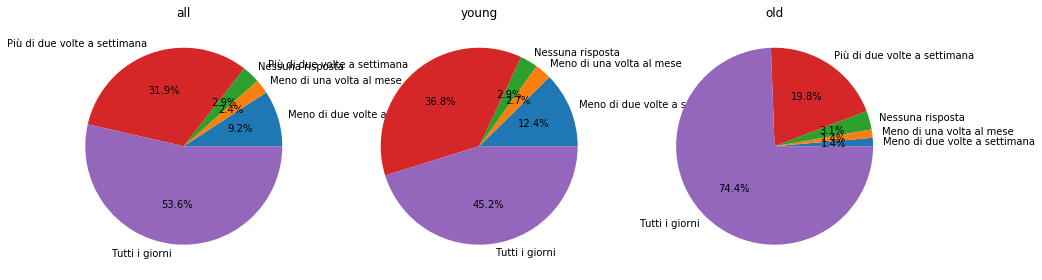

raramente                         520
mai                               257
spesso                            188
Nessuna risposta                   30
sempre                             19
mai, raramente, spesso, sempre      2
mai, raramente                      2
mai, spesso                         1
mai, raramente, spesso              1
raramente, spesso                   1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Carta (es. giornali, riviste, ecc.)], dtype: int64


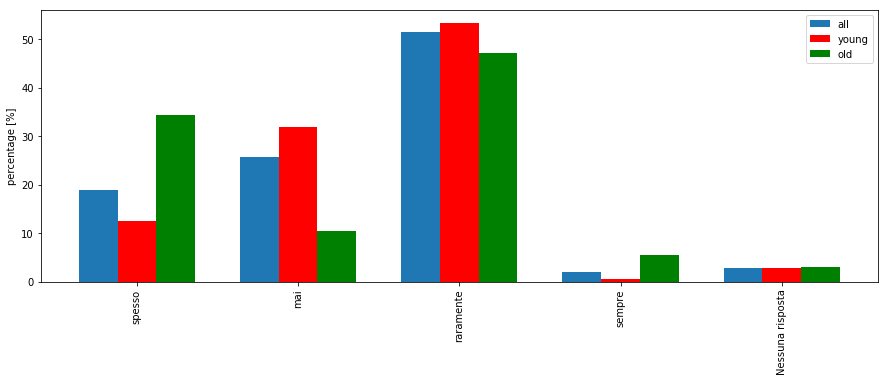

spesso                            464
raramente                         326
mai                               108
sempre                             85
Nessuna risposta                   30
raramente, spesso                   3
mai, raramente, spesso, sempre      2
spesso, sempre                      1
mai, spesso                         1
mai, raramente, spesso              1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Tv (es. telegiornali, talkshow)], dtype: int64


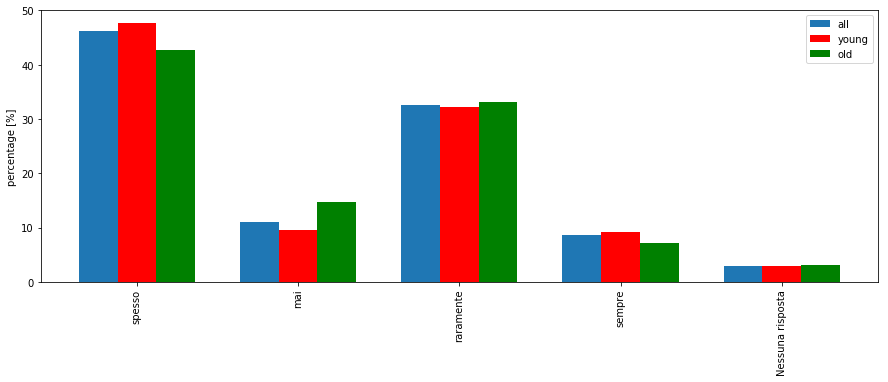

raramente                         395
mai                               340
spesso                            210
sempre                             36
Nessuna risposta                   30
mai, raramente                      5
mai, raramente, spesso, sempre      2
spesso, sempre                      1
mai, raramente, spesso              1
raramente, spesso                   1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Radio (es. giornaleradio)], dtype: int64


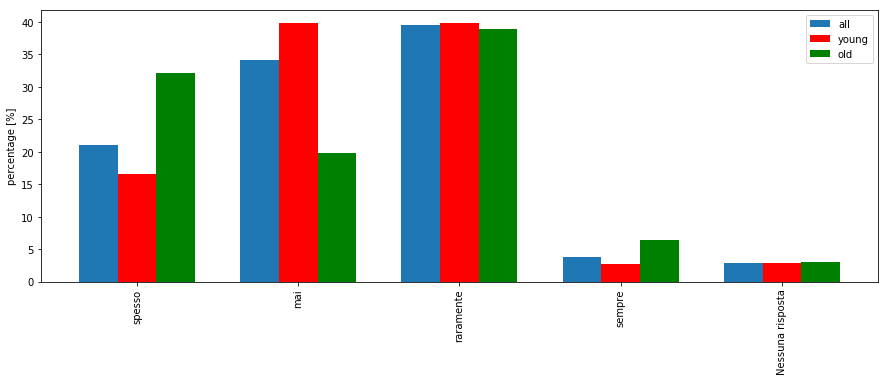

spesso                            564
raramente                         263
sempre                            118
Nessuna risposta                   30
mai                                30
raramente, spesso                   7
spesso, sempre                      3
mai, raramente, spesso, sempre      2
mai, spesso                         2
mai, raramente                      1
mai, raramente, spesso              1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Persone (amici, scuola, famiglia)], dtype: int64


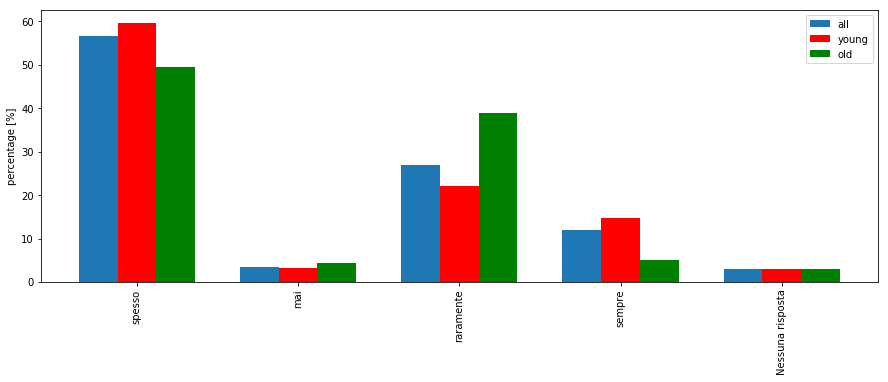

sempre                            624
spesso                            331
Nessuna risposta                   30
raramente                          19
mai                                 7
spesso, sempre                      4
mai, raramente, spesso, sempre      2
mai, sempre                         1
mai, spesso, sempre                 1
mai, spesso                         1
mai, raramente, spesso              1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Internet], dtype: int64


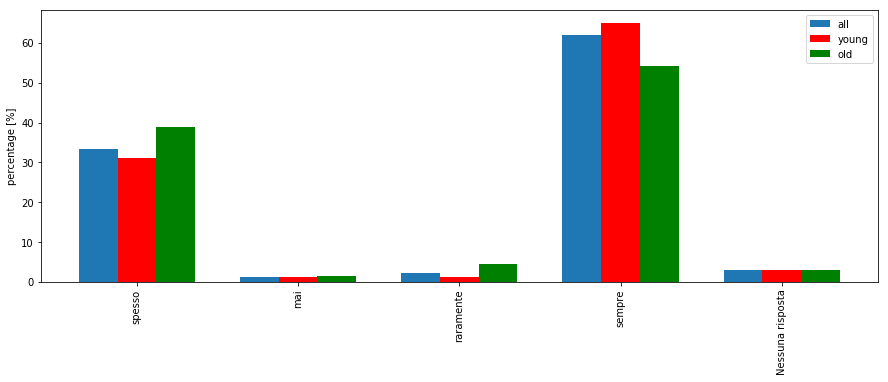

mai                               425
raramente                         374
spesso                            134
sempre                             41
Nessuna risposta                   30
mai, raramente                      7
raramente, spesso                   6
mai, raramente, spesso, sempre      2
mai, spesso                         1
mai, raramente, spesso              1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Altro], dtype: int64


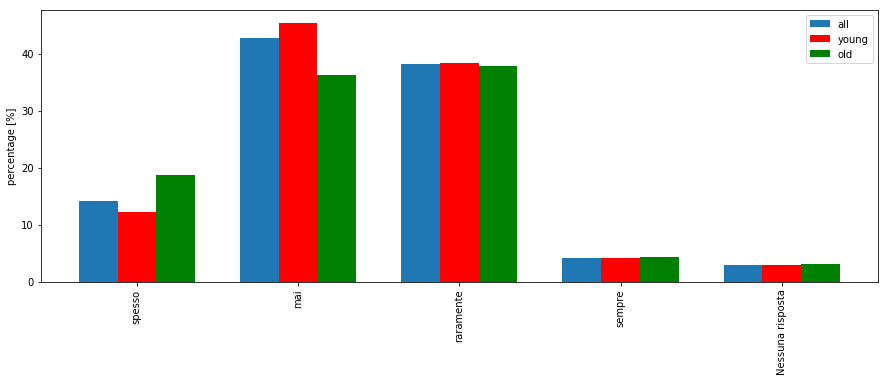

Internet            832
Persone              52
Carta                52
Tv                   35
Nessuna risposta     30
Altro                11
Radio                 9
Name: Tra gli strumenti che negli ultimi 12 mesi hai utilizzato per cercare informazioni, qual è quello che preferisci usare? , dtype: int64


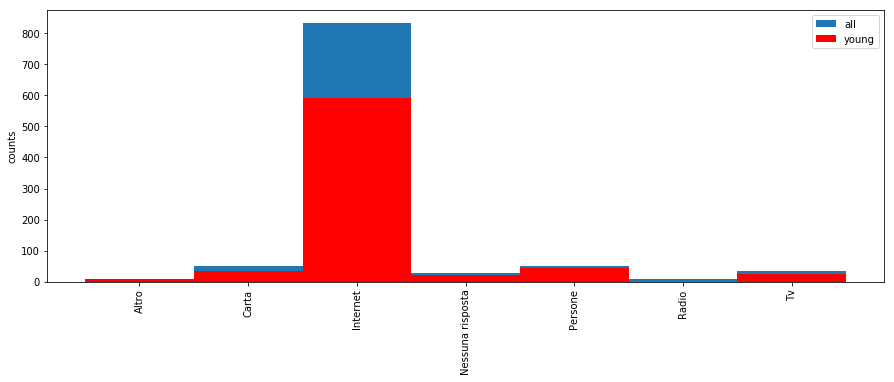

circa 30 minuti      434
meno di 10 minuti    316
circa 1 ora          159
più di un'ora         82
Nessuna risposta      30
Name: Negli ultimi 12 mesi, quando hai cercato notizie, quanto tempo hai impiegato mediamente al giorno nella ricerca?, dtype: int64


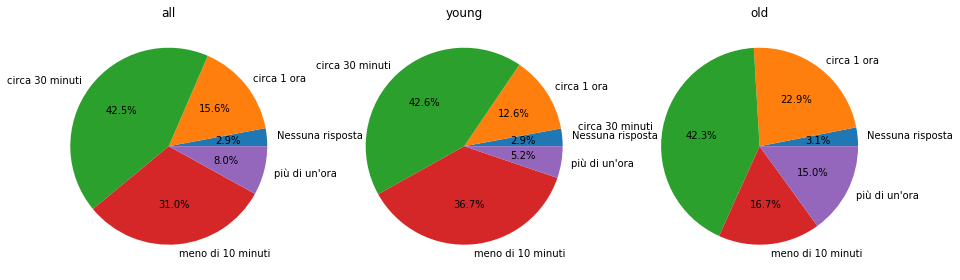

terrorismo, violenze e/o abusi sulle donne, violenze e/o abusi sui minori             154
altro                                                                                  84
catastrofi naturali                                                                    76
bullismo, violenze e/o abusi sulle donne, violenze e/o abusi sui minori                72
terrorismo, violenze e/o abusi sui minori, catastrofi naturali                         67
terrorismo                                                                             64
terrorismo, catastrofi naturali                                                        61
terrorismo, violenze e/o abusi sulle donne, catastrofi naturali                        60
violenze e/o abusi sulle donne, violenze e/o abusi sui minori, catastrofi naturali     50
violenze e/o abusi sulle donne, violenze e/o abusi sui minori                          41
violenze e/o abusi sui minori                                                          31
Nessuna ri

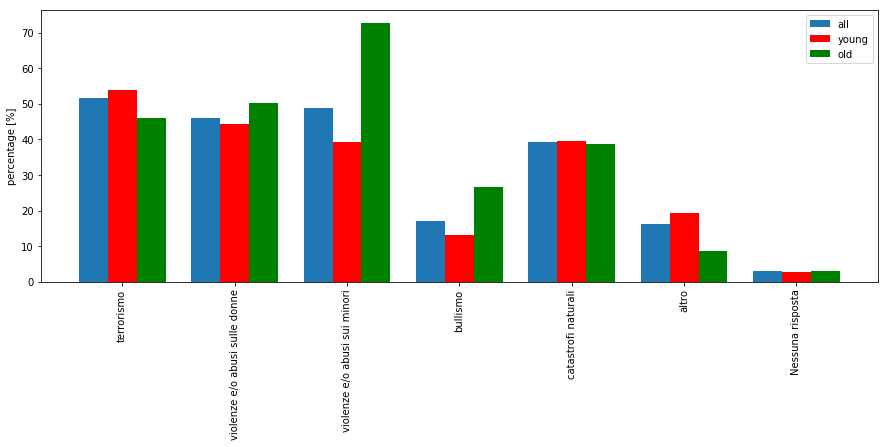

settimanalmente     381
mensilmente         274
giornalmente        172
praticamente mai    164
Nessuna risposta     30
Name: Con che frequenza ti informi su argomenti riguardanti la scienza?, dtype: int64


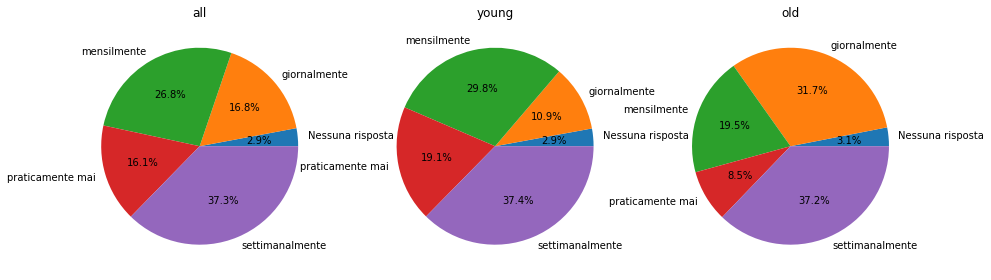

Nessuna risposta                                                   194
astronomia, curiosità scientifiche, tecnologia, innovazione         42
medicina, ecologia/clima, tecnologia, innovazione                   39
medicina, curiosità scientifiche, tecnologia, innovazione           39
ecologia/clima, curiosità scientifiche, tecnologia, innovazione     35
medicina, ecologia/clima, curiosità scientifiche                    21
tecnologia, innovazione                                             21
ecologia/clima, astronomia, tecnologia, innovazione                 20
ecologia/clima, astronomia, curiosità scientifiche                  19
medicina, curiosità scientifiche, biologia                          16
astronomia                                                          16
curiosità scientifiche                                              16
medicina                                                            15
ecologia/clima, curiosità scientifiche, biologia                    15
medici

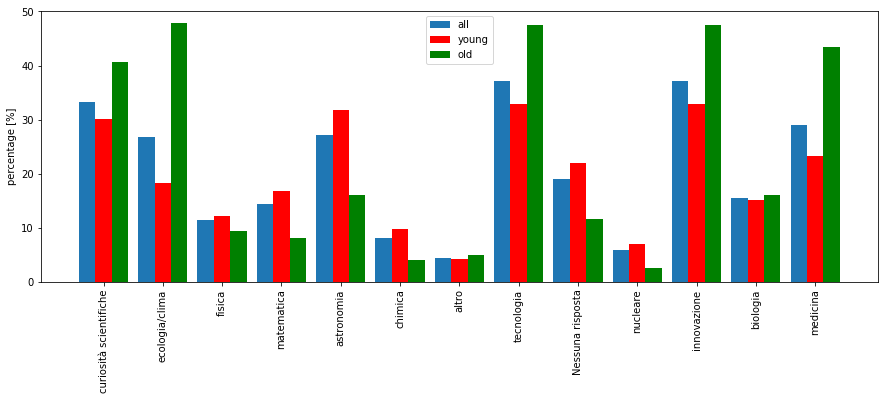

commenti e discussioni riguardo la notizia                                                                                                                                                                                                                       181
i video                                                                                                                                                                                                                                                          108
non so                                                                                                                                                                                                                                                            59
i titoli delle testate giornalistiche                                                                                                                                                                                    

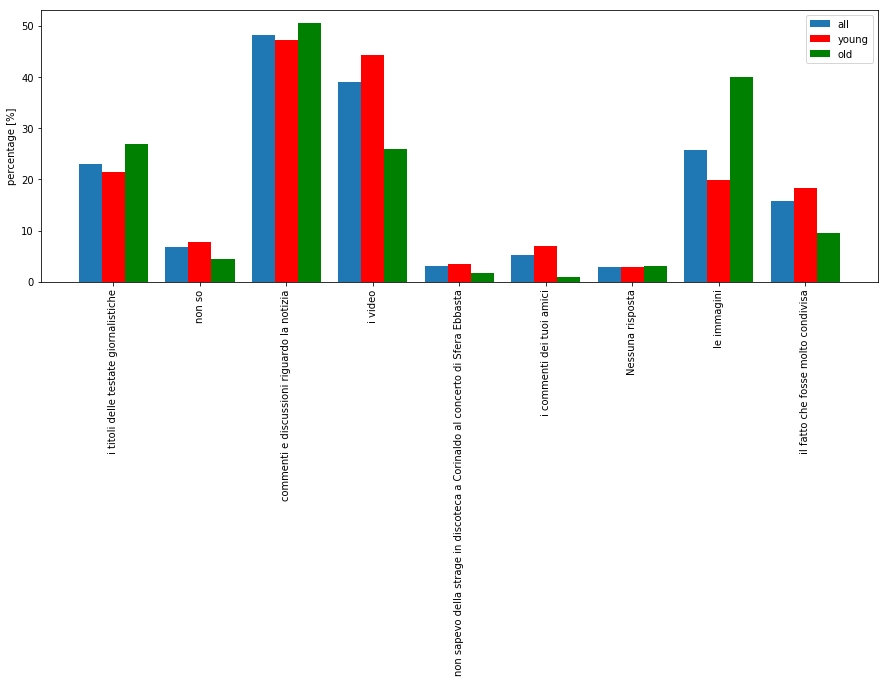

dalla tv                                                                                                                                                            543
da internet                                                                                                                                                          96
da internet, dalla tv                                                                                                                                                92
dalla tv, da una persona che ne parlava                                                                                                                              42
dalla radio                                                                                                                                                          41
da una persona che ne parlava                                                                                                                                   

ValueError: ignored

<Figure size 1080x360 with 0 Axes>

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
def multiple_choice(question, db):
  multiple_answar = db[question].str.split(',\s*').apply(lambda x: pd.Series(1,index=x)).fillna(0)
  labels=[]
  values=[]
  for i in range (0, len(multiple_answar.columns)):
    labels.append(multiple_answar.columns[i])
    values.append(multiple_answar[multiple_answar.columns[i]].sum())
  return values, labels

show_as_pie = 6
show_as_hist = 40

from sklearn.preprocessing import OrdinalEncoder
for i in range (1, len(df.columns)):
  print (df[df.columns[i]].value_counts())
  if np.max(df[df.columns[i]].astype(str).str.find(','))>-1:
    plt.figure(figsize=(15,5))
    values,labels = multiple_choice(question=df.columns[i], db=df)
    values_y,labels_y = multiple_choice(question=df.columns[i], db=young)
    values_o,labels_o = multiple_choice(question=df.columns[i], db=old)
    # valori in percentule
    values   = np.array(values) * 100./len(df)
    values_y = np.array(values_y) * 100./len(young)
    values_o = np.array(values_o) * 100./len(old)
    #
    all_lables = labels + labels_y + labels_o
    all_lables = list(set(all_lables))
    all_values=np.zeros(len(labels))
    all_values_y=np.zeros(len(all_lables))
    all_values_o=np.zeros(len(all_lables))
    for i in range(0, len(all_lables)):
      if all_lables[i] in labels:
        all_values[i] = values[labels.index(all_lables[i])]
      if all_lables[i] in labels_y:
        all_values_y[i] = values_y[labels_y.index(all_lables[i])]
      if all_lables[i] in labels_y:
        all_values_o[i] = values_o[labels_o.index(all_lables[i])]
    
    
    x = np.linspace(0,len(all_lables),len(all_lables))
    plt.bar(x-0.3, np.array(all_values), width=0.3, label='all')
    plt.bar(x, np.array(all_values_y), width=0.3, color='red', label='young')
    plt.bar(x+0.3, np.array(all_values_o), width=0.3, color='green', label='old')
    plt.xticks(x, all_lables, rotation='vertical')
    plt.ylabel('percentage [%]')
    plt.legend()
  else:
    ordinal_encoder = OrdinalEncoder()
    ordinated_encoded = ordinal_encoder.fit_transform(df[[df.columns[i]]])
    ordinated_encoded_young = ordinated_encoded[df.young==1]
    ordinated_encoded_old = ordinated_encoded[df.young==0]
    labels = np.array(ordinal_encoder.categories_[0])
    if len(ordinal_encoder.categories_[0])<show_as_pie :
      fig, ax = plt.subplots(1,3, figsize=(15, 5))
      val, _ = np.histogram(ordinated_encoded, bins=len(labels))
      ax[0].pie(val, labels=labels, autopct='%1.1f%%')
      ax[0].set_title('all')
      val, _ = np.histogram(ordinated_encoded_young, bins=len(labels))
      ax[1].pie(val, labels=labels, autopct='%1.1f%%')
      ax[1].set_title('young')
      val, _ = np.histogram(ordinated_encoded_old, bins=len(labels))
      ax[2].pie(val, labels=labels, autopct='%1.1f%%')
      ax[2].set_title('old')
    else:
      cat_num = np.linspace(1,len(ordinal_encoder.categories_[0]),len(ordinal_encoder.categories_[0]))
      if len(cat_num) > show_as_hist:
        cat_num = cat_num[::len(cat_num)//show_as_hist]
        labels = labels[::len(cat_num)//show_as_hist]
      plt.figure(figsize=(15,5))
      plt.hist(ordinated_encoded, range=(0,len(ordinal_encoder.categories_[0])), 
               bins=len(ordinal_encoder.categories_[0]), label='all')
      plt.hist(ordinated_encoded_young, range=(0,len(ordinal_encoder.categories_[0])), 
               bins=len(ordinal_encoder.categories_[0]), color='red', label='young')
      plt.xticks(cat_num-0.5,labels, rotation='vertical')
      plt.ylabel('counts')
      plt.legend()
  plt.show()

# test area


In [0]:
def multiple_choice(question, db):
  multiple_answar = db[question].str.split(',\s*').apply(lambda x: pd.Series(1,index=x)).fillna(0)
  labels=[]
  values=[]
  print (len(multiple_answar.columns))
  for i in range (0, len(multiple_answar.columns)):
    labels.append(multiple_answar.columns[i])
    values.append(100*multiple_answar[multiple_answar.columns[i]].sum())
  return values, labels

q = 'Sai quali pericoli potrebbero esserci nel postare le foto sui social?'
#q = 'Sul web, dove prendi le informazioni? [motori di ricerca (es google, safari, ping]'
q ='Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Carta (es. giornali, riviste, ecc.)]'
values,labels = multiple_choice(question=q, db=df)
values_y,labels_y = multiple_choice(question=q, db=young)
print (labels)
print ("all",values, sum(values))
print (labels_y)
print ("young:",values_y, sum(values_y))
all_lables = labels + labels_y
all_lables = list(set(all_lables))
all_values=np.zeros(len(all_lables))
all_values_y=np.zeros(len(all_lables))
for i in range(0, len(all_lables)):
  if all_lables[i] in labels:
    all_values[i] = values[labels.index(all_lables[i])]
  if all_lables[i] in labels_y:
    all_values_y[i] = values_y[labels_y.index(all_lables[i])]

print (all_lables)
print (all_values)
print (all_values_y)

    

5
5
['raramente', 'mai', 'spesso', 'sempre', 'Nessuna risposta']
all [52500.0, 26300.0, 19300.0, 2100.0, 3000.0] 103200.0
['mai', 'spesso', 'raramente', 'Nessuna risposta', 'sempre']
young: [23200.0, 9200.0, 38800.0, 2100.0, 500.0] 73800.0
['spesso', 'raramente', 'sempre', 'mai', 'Nessuna risposta']
[19300. 52500.  2100. 26300.  3000.]
[ 9200. 38800.   500. 23200.  2100.]


In [0]:
df['Sai quali pericoli potrebbero esserci nel postare le foto sui social?'].apply(
    lambda x: 'lo so - ma non mi interessa' if x == 'lo so, ma non mi interessa' else x)


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
def plot_multiple_choice(question, db, figsize):
  %matplotlib inline
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots(figsize=figsize)
  multiple_answar = db[question].str.split(',\s*').apply(lambda x: pd.Series(1,index=x)).fillna(0)
  labels=[]
  values=[]
  for i in range (0, len(multiple_answar.columns)):
    labels.append(multiple_answar.columns[i])
    values.append(100*multiple_answar[multiple_answar.columns[i]].sum()/len(db))
  x = np.linspace(0,len(labels),len(labels))
  bp = ax.bar(x, np.array(values))
  plt.xticks(x, labels, rotation='vertical')
  plt.ylabel('percentage [%]')
  return bp

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  import matplotlib.pyplot as plt
  import os
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)
show_as_pie = 6
show_as_hist = 40

from sklearn.preprocessing import OrdinalEncoder
for i in range (1, len(df.columns)):
  print (df[df.columns[i]].value_counts())
  df["multiple"]=df[df.columns[i]].astype(str).str.find(',')
  if np.max(df["multiple"])>-1:
    plot_multiple_choice(question=df.columns[i], db=df, figsize=(15,5))
  else:
    ordinal_encoder = OrdinalEncoder()
    ordinated_encoded = ordinal_encoder.fit_transform(df[[df.columns[i]]])
    labels = np.array(ordinal_encoder.categories_[0])
    if len(ordinal_encoder.categories_[0])<show_as_pie :
      val, _ = np.histogram(ordinated_encoded, bins=len(labels))
      plt.figure(figsize=(5,5))
      plt.pie(val, labels=labels)
    else:
      cat_num = np.linspace(1,len(ordinal_encoder.categories_[0]),len(ordinal_encoder.categories_[0]))
      if len(cat_num) > show_as_hist:
        cat_num = cat_num[::len(cat_num)//show_as_hist]
        labels = labels[::len(cat_num)//show_as_hist]
      plt.figure(figsize=(15,5))
      plt.hist(ordinated_encoded, range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]))
      plt.xticks(cat_num-0.5,labels, rotation='vertical')
  plt.show()

# Look into data

In [0]:
df.info()

In [0]:
df.describe()

In [0]:
print(df['Cittadinanza'].value_counts())

# info
jupyter notebook: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

selezionare elemeni in array o liste: https://teamtreehouse.com/community/how-do-i-get-the-first-4-and-last-4-items-of-a-list

machine leaenring https://medium.com/botsupply/il-machine-learning-%C3%A8-divertente-parte-1-97d4bce99a06



# GET data from local file with autentication




In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/
!ls "/content/drive/My Drive/Colab Notebooks"
import pandas as pd
csv_file = "/content/drive/My Drive/Colab Notebooks/_Be a Data Scientist a #IJF19 (Responses) - Form Responses 1.csv"
PROJECT_ROOT_DIR = "/content/drive/My Drive/Colab Notebooks/"
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
df = pd.read_csv(csv_file)
df.head()

# example of dataset visualizzation

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
df['Sesso'].value_counts().plot(kind='pie')
plt.show()  
df['Sesso'].value_counts()


istogramma... 
l'ordine prescelto per una visulizzazione semplice e' in base a gli entries (che falsa la visulizzazione)

In [0]:
df['Età in anni compiuti'].value_counts().plot(kind='bar')
plt.show()  
 

data are index in ASCI oder and must be reindex 

In [0]:
ordine_eta = ['tra 11 e 14', 'tra 15 e 17', 'tra 18 e 19',
       'tra 20 e 24', 'tra 25 e 34', 'tra 35 e 44', 'tra 45 e 54',
       'tra 55 e 64', 'tra 65 e 74', '75 e oltre']
df['Età in anni compiuti'].value_counts().reindex(ordine_eta).plot(kind='bar')
plt.show() 

In [0]:
cat_eta = pd.Categorical(df['Età in anni compiuti'], 
                     categories=ordine_eta, 
                     ordered=True)
cat_eta.value_counts().plot(kind='bar')
plt.show()

per passarlo ad algorirmi di machine lenrning e' necessario indicizzarlo corretamente

In [0]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[ordine_eta])
eta_encoded = ordinal_encoder.fit_transform(df[['Età in anni compiuti']])

segue esempio di unsepevised machine lerning che separa in 2 cluster
dati raw

In [0]:
print(ordinal_encoder.categories_)
plt.hist(eta_encoded)
plt.show()

applichaimo una classificazione per capire le famiglie di dati separati in 2 cluster usando KMeans

In [0]:
from sklearn import cluster
import numpy as np
X = eta_encoded
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X)
#labels = dff.columns
labels = k_means.labels_
#plt.scatter(X[:,1], X[:,0], c=labels.astype(np.float))
plt.hist(X, range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]))
plt.hist(X[labels==0], range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]),color = 'r')
plt.xticks([0,1,2,3,4,5,6,7,8,9], ordine_eta, rotation='vertical')
plt.show()
print(ordinal_encoder.categories_[0])


campi con rispote multiple: esempio con il campo "Quali argomenti ti vengono suggeriti mentre sei online"

In [0]:
question='Quali argomenti ti vengono suggeriti mentre sei online'
question='Negli ultimi 12 mesi, quando hai cercato notizie, quanto tempo hai impiegato mediamente al giorno nella ricerca?'
df["multiple"]=df[question].str.find(',')
if np.max(df["multiple"])>-1:
  print (len(df[question].str.split(',\s*')))
np.max(df["multiple"])


-1

In [0]:
multiple_answar = df['Quali argomenti ti vengono suggeriti mentre sei online'].str.split(',\s*').apply(lambda x: pd.Series(1,index=x)).fillna(0)
multiple_answar.hist(figsize=(20,15))

plt.show()

In [0]:
labels=[]
values=[]
plt.figure(figsize=(10,5))
for i in range (1, len(multiple_answar.columns)):
  #print(multiple_answar.columns[i], multiple_answar[multiple_answar.columns[i]].sum())
  labels.append(multiple_answar.columns[i])
  values.append(multiple_answar[multiple_answar.columns[i]].sum()/len(df))
x = np.linspace(0,len(labels),len(labels))
plt.bar(x, np.array(values))
plt.xticks(x, labels, rotation='vertical')
plt.ylabel('percentage')
plt.show()

In [0]:
def plot_multiple_choice(question, db, fsize):
  %matplotlib inline
  import matplotlib.pyplot as plt
  multiple_answar = db[question].str.split(',\s*').apply(lambda x: pd.Series(1,index=x)).fillna(0)
  labels=[]
  values=[]
  plt.figure(figsize=fsize)
  for i in range (1, len(multiple_answar.columns)):
    labels.append(multiple_answar.columns[i])
    values.append(multiple_answar[multiple_answar.columns[i]].sum()/len(db))
  x = np.linspace(0,len(labels),len(labels))
  plt.bar(x, np.array(values))
  plt.xticks(x, labels, rotation='vertical')
  plt.ylabel('percentage [%]')
  plt.show()

plot_multiple_choice(question='Quali social usi di più per informarti?', db=df, fsize=(10,5))
